# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.


The data was organized  by Dr. Sina Kashuk at CUSP.
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


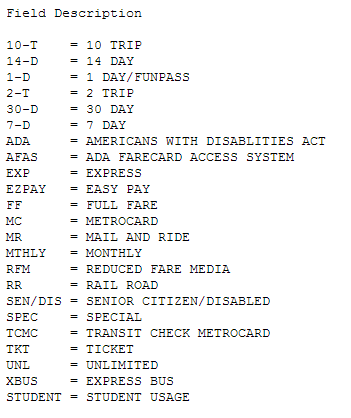

In [1]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)




In [2]:
# Template setup


from __future__ import print_function, division
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

% matplotlib inline

# Seed

np.random.seed(1452)

# Alpha

alpha = 0.05

In [3]:
mtaFares = np.load("MTA_Fare.npy")

In [4]:
mtaFares

array([[[56961, 64703, 68002, ..., 36527, 33929, 36824],
        [ 1732,  2083,  2107, ...,  1264,  1172,  1238],
        [  203,   276,   245, ...,   186,   167,   167],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [   -1,    -1,    -1, ...,  1121,  1377,   712]],

       [[16210, 20179, 21769, ...,    -1,    -1,    -1],
        [  503,   647,   665, ...,    -1,    -1,    -1],
        [   41,    43,    44, ...,    -1,    -1,    -1],
        ..., 
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [   -1,    -1,    -1, ...,    -1,    -1,    -1]],

       [[ 3292,  3429,  3629, ...,  3746,  3406,  3217],
        [  110,    92,   102, ...,   212,   209,   211],
        [    7,     6,    13, ...,    26,    20,    22],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0, 

In [5]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In [6]:
weeklySwipes = np.nansum(mtaFares, axis=0).sum(axis=0)

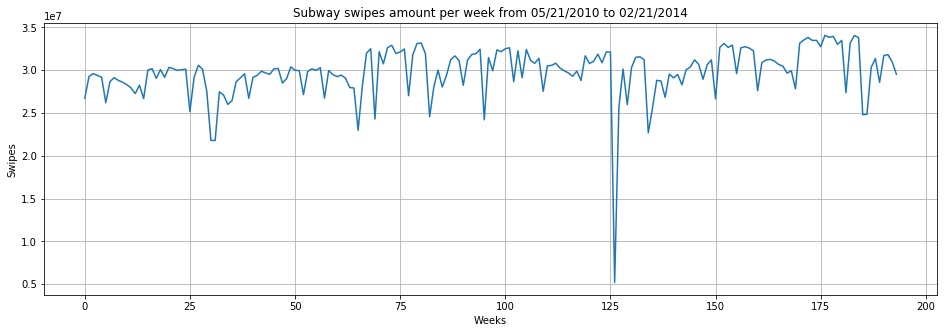

In [7]:
fig, ax = plt.subplots(figsize=(16, 5))
ax = plt.plot(np.arange(weeklySwipes.size), weeklySwipes)
plt.title("Subway swipes amount per week from 05/21/2010 to 02/21/2014")
plt.xlabel("Weeks")
plt.ylabel("Swipes")
plt.grid(True)

#### Figure 1
The figure above shows subway swipes per week from 05/21/2010 to 02/21/2014. There is a significant anomaly around the week 125, with very low swipes. It seems that something happened and prevented people from getting to the subway. 

In [8]:
# Setting up the mean and the standard deviation to determine the outlier
mean = np.mean(weeklySwipes)
std = np.std(weeklySwipes, ddof=1)
significance = [mean + 3 * std, mean - 3 * std]

print(significance)

[38753266.664731532, 20802736.551763311]


In [9]:
# Calculating the Z-score to define the outlier week with minimum swipes

zScore = (weeklySwipes - mean) / std
outlier = np.argmin(zScore) + 1 # finding the minimal argument
print("The week number with minimum swipes is: {}".format(outlier))

The week number with minimum swipes is: 127


In [10]:
# Setting up the start date and end date

startDate = datetime(2010, 5, 21)
endDate = datetime(2014, 2, 21)

In [11]:
# Finding the date of the outlier week

outlierDate = startDate + timedelta(days=7*127)
print(outlierDate)

2012-10-26 00:00:00


Turned out, that on October 22, 2012, Hurricane Sandy formed. https://en.wikipedia.org/wiki/Hurricane_Sandy The week of October 26 must have been the week when Sandy striked New York, locking people in their homes and immobilizing commute.

## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [12]:
weeklySwipes = np.nansum(mtaFares, axis=0)

In [13]:
# First 10 weeks

head = np.log10(weeklySwipes.T[0:10])

C:\Users\ruham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Last 10 weeks

tail = np.log10(weeklySwipes.T[184:195])

C:\Users\ruham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


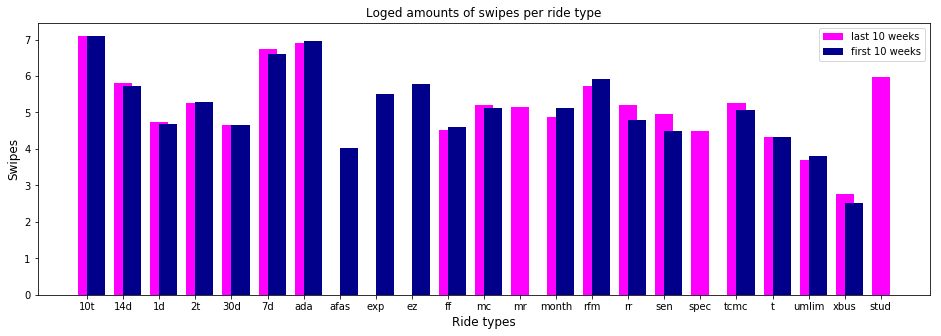

In [15]:
plt.figure(figsize=(16,5))
types = len(ridetype)
xAxis = range(types)
labels = [ridetype[0], ridetype[1], ridetype[2], ridetype[3], 
          ridetype[4], ridetype[5], ridetype[6], ridetype[7], 
          ridetype[8], ridetype[9], ridetype[10], ridetype[11], 
          ridetype[12], ridetype[13], ridetype[14], ridetype[15], 
          ridetype[16], ridetype[17], ridetype[18], ridetype[19], 
          ridetype[20], ridetype[21], ridetype[22]]
plt.xticks(xAxis, labels)
plt.bar(xAxis, tail.mean(axis=0), color='magenta', align='center', label='last 10 weeks', width=0.5)
plt.bar(xAxis, head.mean(axis=0), color='darkblue', align='edge', label='first 10 weeks', width=0.5)
plt.xlabel('Ride types', fontsize=12)
plt.ylabel('Swipes', fontsize=12)
plt.title('Loged amounts of swipes per ride type', fontsize=12)
plt.legend()

#### Figure 2:
Interestingly, there are ridership types such as 'afas', 'exp', and 'ex' that do not have data for the last 10 weeks, and there are 'mr', 'stud' that do not have data for the first 10 weeks. I can assume that the first category started at some point but than was cancelled, whereas the second category has been introduced at least 10 weaks after the starting point of the time range.

In [16]:
swipesPerWeek = np.nanmean(mtaFares, axis=0)
swipesPerWeek.shape

(23, 194)

In [17]:
# creating a dataframe for the swipes per 194 weeks

cardsDf = pd.DataFrame(swipesPerWeek).T
cardsDf.tail()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
189,19888.053333,1021.926667,85.876667,281.323333,72.146667,8283.215000,13750.365000,-0.226667,-0.226667,-0.230000,...,123.091667,901.875000,271.796667,148.693333,41.943333,231.708333,16.613333,3.601667,0.123333,1969.948333
190,21898.703333,1189.298333,95.116667,315.710000,79.443333,9185.791667,15744.166667,-0.226667,-0.220000,-0.228333,...,162.816667,1011.613333,324.636667,173.038333,47.830000,231.281667,30.185000,6.545000,1.056667,1750.036667
191,21982.453333,1158.326667,97.721667,306.835000,101.605000,9331.831667,15515.201667,-0.226667,-0.230000,-0.225000,...,145.283333,1010.085000,313.486667,169.976667,51.240000,284.736667,38.785000,8.766667,1.206667,1887.641667
192,20834.365000,1116.818333,93.980000,299.820000,98.771667,9251.925000,15050.763333,-0.223333,-0.220000,-0.228333,...,137.660000,984.520000,299.283333,168.223333,40.941667,281.310000,39.331667,9.370000,1.121667,2298.776667
193,20766.348333,1132.265000,91.756667,298.708333,77.868333,9008.231667,14508.353333,-0.230000,-0.225000,-0.228333,...,123.556667,919.780000,284.526667,161.248333,43.951667,310.373333,40.548333,10.076667,1.136667,891.466667


C:\Users\ruham\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """


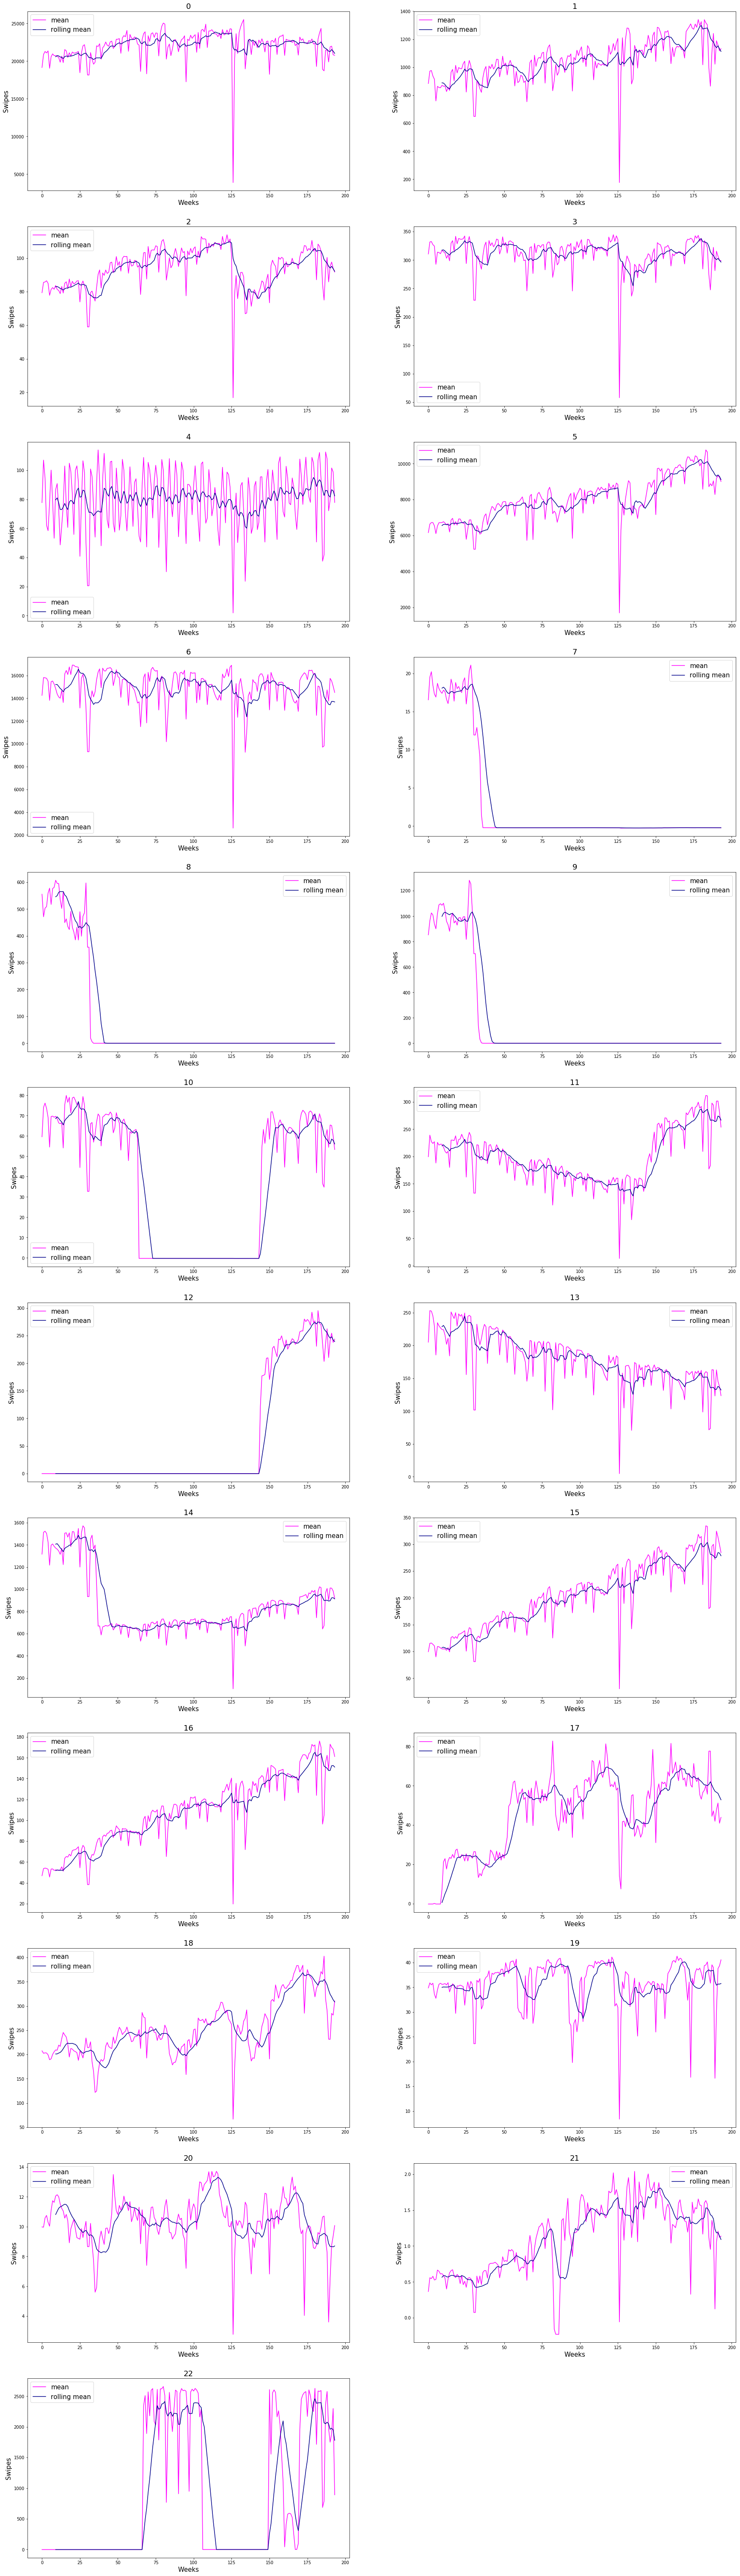

In [18]:
fig = plt.figure(figsize=(30, 120))

for i in cardsDf.keys():
    ax = fig.add_subplot(13, 2, i+1)
    rollingMean = pd.rolling_mean(cardsDf[i], 10)
    ax.plot(np.arange(len(cardsDf[i])), cardsDf[i], label='mean', color='magenta')
    ax.plot(np.arange(len(cardsDf[i])), rollingMean, label='rolling mean', color='darkblue')
    ax.set_title(i, fontsize=18)
    plt.ylabel('Swipes', fontsize=15)
    plt.xlabel('Weeks', fontsize=15)
    plt.legend(fontsize=15)

#### Figure 3:
Plot of every 23 types of cards. We can clearly see that plots #15 and #16 show a steady increase, wherease the plot #13 shows a constant decrease. 

In [19]:
# Getting the usage ratios as a difference of means and rolling means

usageRatio = []

for i in cardsDf:
    usageRatio.append(pd.rolling_mean(cardsDf[i], 10).head(10).sum() / 
                      pd.rolling_mean(cardsDf[i], 10).tail(10).sum())
usageRatio

C:\Users\ruham\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
C:\Users\ruham\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  import sys


[0.095168129031277762,
 0.075300909417922599,
 0.085388451846659455,
 0.10277804590155586,
 0.093460866499246731,
 0.068597476555532916,
 0.10859310466919145,
 -8.020784023668595,
 -244.39156401657465,
 -439.72511743866602,
 0.1155595014362837,
 0.081218211841310506,
 -8.6113074068319153e-05,
 0.16623767739061057,
 0.15396025659875517,
 0.037867062370531696,
 0.033927650116535715,
 0.00091141311899781282,
 0.060088259362531857,
 0.094427092797527298,
 0.11901888425871576,
 0.043183063067653446,
 -4.8662386171784928e-05]

In [20]:
usageRatio[13]

0.16623767739061057

In [21]:
usageRatio[15]

0.037867062370531696

In [22]:
usageRatio[16]

0.033927650116535715


## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [23]:
weeklyStations = np.nansum(mtaFares, axis=1)
weeklyStations.shape

(600, 194)

In [24]:
# Dataset of all stations

stationsDf = pd.DataFrame(weeklyStations).T
stationsDf.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,126877,37305,6605,16377,18563,19986,12448,11090,10481,147186,...,-23,-23,-23,-23,-23,-23,-23,-23,-23,-23
1,149476,46463,6880,17407,19902,20624,13643,11658,11029,154825,...,-23,-23,-23,-23,-23,-23,-23,-23,-23,-23
2,152382,49358,7228,17594,19947,21224,13718,12036,10880,155957,...,-23,-23,-23,-23,-23,-23,-23,-23,-23,-23
3,160174,44848,5730,14241,16075,17411,11459,9808,9122,154913,...,-23,-23,-23,-23,-23,-23,-23,-23,-23,-23
4,162640,41508,7031,17588,20282,20908,14093,11943,10922,157627,...,-23,-23,-23,-23,-23,-23,-23,-23,-23,-23


Text(0.5,1,'Periodic time series of the time range')

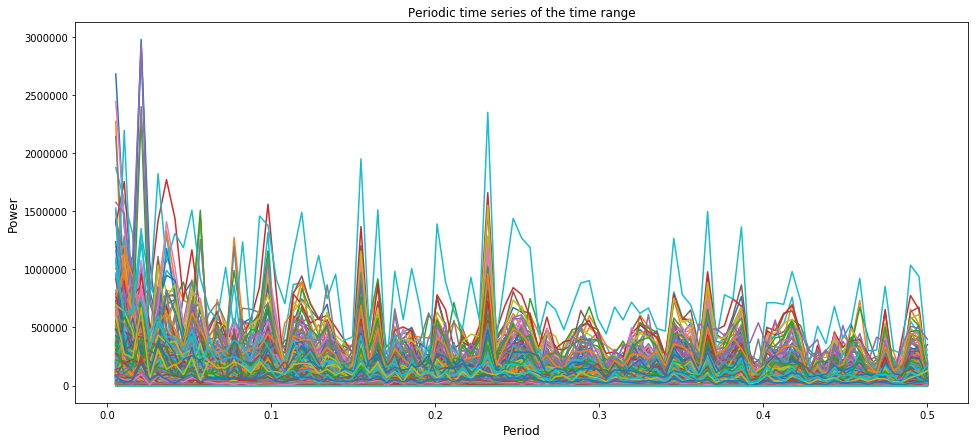

In [25]:
stnum = len(stationsDf)

fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111)
for i in stationsDf.keys():
    frequency = np.abs(np.fft.rfft(stationsDf[i]))
    ax.plot(np.fft.rfftfreq(stnum, 1.0)[1:], (frequency[1:]), '-')
plt.xlabel('Period', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.title('Periodic time series of the time range', fontsize=12)

#### Figure 4:
The figure shows the frequencies of swipes within the time periods (194 weeks) of the given range at the level of all MTA 600 stations.

In [26]:
# Creating an array to store the powers of all the weeks

weeklyPower = []
for i in range(0, 600):
    weeklyPower.append((np.abs(np.fft.rfft(stationsDf[i]))[4]))
    
mostPowerful = sorted(weeklyPower, reverse=True)[:4] # Getting the top 4 "most powerful" stations
print(mostPowerful)

[2980184.9113423442, 2950375.4711558297, 2931882.3472655215, 2402206.9930728795]


In [27]:
# Finding out the station numbers of top 4 "most powerful" stations

for i in range (0,4):
    print(np.where(np.abs(np.fft.rfft(weeklyStations))[:, 4] == mostPowerful[i]))

(array([0], dtype=int64),)
(array([194], dtype=int64),)
(array([150], dtype=int64),)
(array([327], dtype=int64),)


In [28]:
# Plotting the data for the most powerful 4 stations

station1 = weeklyStations[0]
station2 = weeklyStations[150]
station3 = weeklyStations[194]
station4 = weeklyStations[327]

allWeeks = pd.date_range(start='05/21/2010', periods=194 , freq='W')

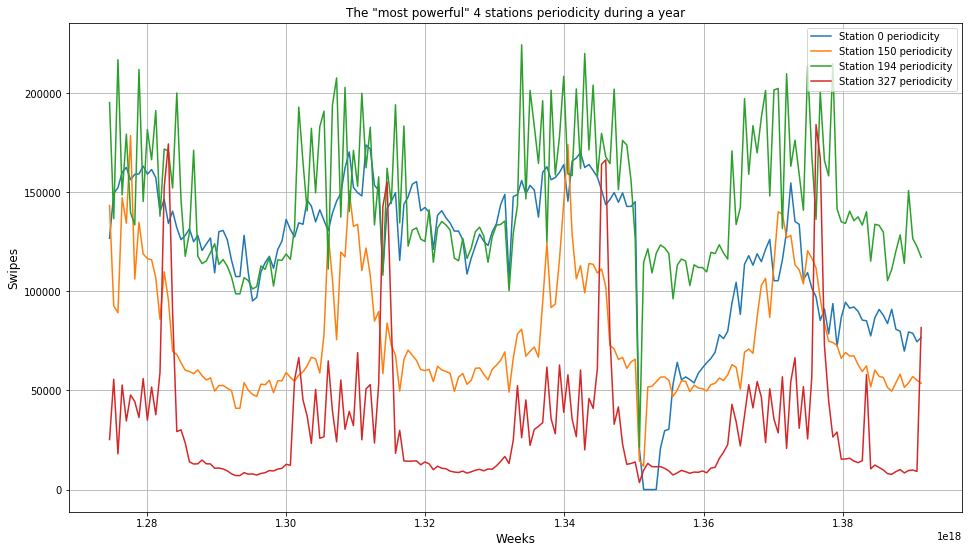

In [29]:
fig=plt.figure(figsize=(16, 9))
plt.plot(allWeeks,(station1), label='Station 0 periodicity')
plt.plot(allWeeks,(station2), label='Station 150 periodicity')
plt.plot(allWeeks,(station3), label='Station 194 periodicity')
plt.plot(allWeeks,(station4), label='Station 327 periodicity')

plt.xlabel('Weeks', fontsize=12)
plt.ylabel('Swipes', fontsize=12)
plt.title('The "most powerful" 4 stations periodicity during a year', fontsize=12)
plt.grid(True)
plt.legend()

#### Figure 5:
The Figure shows the periodicity of the top 4 "most powerful" stations out of 600. These stations show the most prominent periodic trend during 52 weeks.

## EXTRA CREDIT: Cluster. 
### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
### Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

```
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
```

removing empty light curves

```
tots = tots[tots.std(1)>0]
```

with Kmeans you have to choose the number of clusters ahead km = 

```
KMeans(n_clusters=10)
```

and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture. 
```
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
```

then you can run:

```
km.fit(vals)
```

# HINTS: 

## notes and hints: 

   1) you could coerce the data into a pandas dataframe, but the data is truly a "datacube": a 3D dataset, and flattening it into a pandas dataframe will make it far more difficult to manipulate. I strongly recommand you keep it as a numpy array
    
   2) note that the missing values are inputted as -1. if you want to do things like algebra (summing time series for example) you need to take care of that. If you replace the -1 entries with NaN, you may need to use functions that explicitly know how to deal with NaN: for example, to sum use the np.nansum etc
```
np.nanmean(mtarides)
np.nansum(mtarides)
```
as opposed to just 
```
np.mean(mtarides)
np.sum(mtarides)
```
 
## There are 600 stations, 23 card types. The trick to do this homework succesfully is to "collaps" (by averaging, or summing, depending on the question) the appropriate dimension in different parts of the homework: when you need to work at the station level (if I ask "which station is the one that..."), collaps the card type, when you need to work on the card type, collapse the stations. 

When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average - *np.average(....weight=...)* -. The sum and average functions take an *axis* argument, which allows you to control which axis of the cube gets averaged. The dimension of the resulting object will allow you to check that you averaged over the right axis.


# Possibly useful functions

You are already familiar with and have already used  most of the functions I needed to perform this exercise. Here are some reminders and on few functions and methods that you may not have encountered yet which may be useful. You do not have to use them: there are many ways to do things and you do not have to solve this problem like I did, but here they are in case you need some help:

* the numpy function np.where() returns the index where a condition is true. It is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. Look at the notebook on fourier transforms in https://github.com/fedhere/UInotebooks/tree/master/timeseries. If you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft()  

```
np.fft.rfft(mydata) 
```  

      will return the *real* part of the fourier transform (the fourier transform is a *complex* object, and therefore it has a real and an *imaginary* component - that is just math; all you need to know is that you need the real part). But what you want is its absolute value: np.abs(). 
      To plot the fourier transform you may want the x-axis to be in frequency. To get the x-axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

```
np.fft.rfftfreq(N, d) 
```     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the *sample spacing*, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1!)


*  the array methods 
```
np.array.flatten()
np.array.reshape()
```
     allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which I recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series) you can flatten the array as
     
```
mtaarray.flatten()
```

    which returns the flatten array:

```
mtaRides = np.load("MTA_Fare.npy")

mtaRides.shape
Out[10]: (600, 23, 194)

mtaRides.flatten().shape
Out[11]: (2677200,)
````

*  after you operate on the array to collapse an axis, always check the dimensionality to assure you have indeed collapsed the right axis! see cell below

```
import numpy as np
data = np.random.rand(100,10)

print(data.shape)
Out[12]: (100, 10)

print(data.mean())
Out[13]:  0.4902457782

print(data.mean(axis=0).shape, data.mean(axis=1).shape)
Out[14]: (10,) (100,)

```

In [30]:
#after reading the datacube you should see:
mtaRides.shape


NameError: name 'mtaRides' is not defined

ride types list

In [ ]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [ ]:
#after that I create a date range (for example with pd.date_range())
#in a log plot to enhance the visibility along the y axis (np.log10(weightedrides[i]))
#all time series, each station each ride type, look like this (pretty ugly)

In [ ]:
#as described in the instruction for some of the analysis 
#one can sum time series for all stations
print (mtaRide.shape)
mta_allsum = np.nansum(mtaRides, axis=0)
print (mta_allsum.shape)
#or for all ride types
mta_allsum = np.nansum(mtaRides, axis=1)
print (mta_allsum.shape)



## NOTE ON THE TREND DETECTION:
### you should find the *card type* that has the steepest increase, and the steepest decrease. Notice: we are looking for something that has a more or less constant trend

### to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

### you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the *number of rides* near the beginning to the *number of rides* near the end of the time series.

### notice that you should inspect the time series, algorithmically or at least by eye, to ensure you see a trend, and not just changing structure. Below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

In [ ]:
#here is an example of an individual time series that shows a trend, 
#after smoothing by 3 and 10 weeks

In [ ]:
# this is a "power spectrum": the plot of the absolute value of the fourier transform. 
# I changed the xtick labels from frequecy (1/week) to period (in weeks)
# to facilitate the visual identification of the 1-year period peak
# (notice however that np.fft.rfftfreq(N, d)  returns frequency, the inverse of the period: frequency = 1/period. 
# All I did was changing the tick labels): 

...
ax.set_xticklabels([ "%s"%(1/f) for f in allperiods], rotation=90)

In [ ]:
#and here is one of he periodic time series you should find by identifying the time series with the most power 
#at 1/52 weeks frequency in fourier space

## ASH Score 100. Extra Credit 0